In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("train_u6lujuX_CVtuZ9i.txt")

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

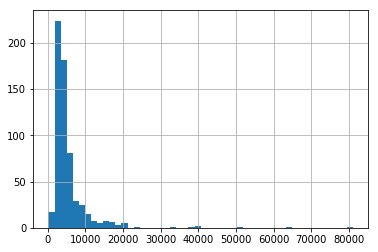

In [7]:
df['ApplicantIncome'].hist(bins=50)

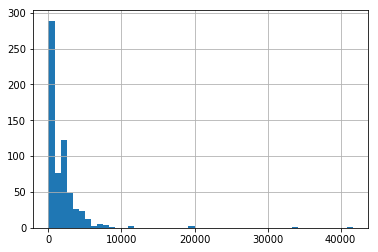

In [8]:
df['CoapplicantIncome'].hist(bins=50)

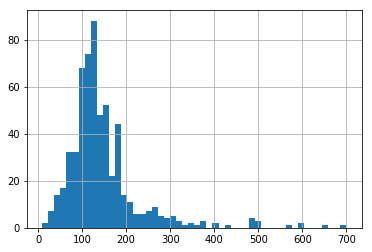

In [9]:
df['LoanAmount'].hist(bins=50)

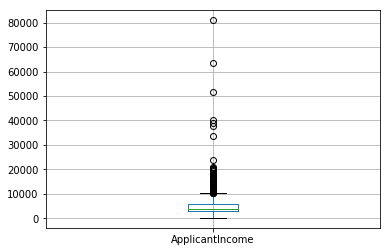

In [10]:
df.boxplot(column='ApplicantIncome')

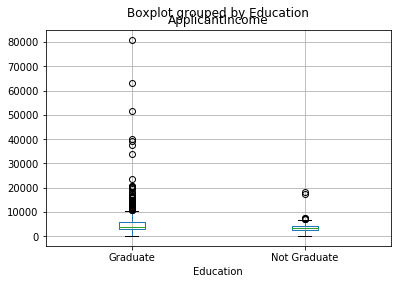

In [11]:
df.boxplot(column='ApplicantIncome',by='Education')

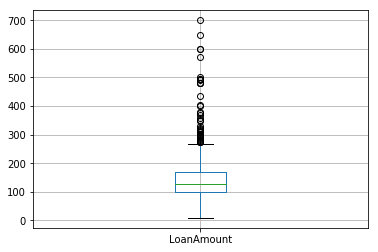

In [12]:
df.boxplot(column='LoanAmount')

In [36]:
temp1=df['Credit_History'].value_counts(ascending=True)

In [37]:
temp1

0.0     89
1.0    475
Name: Credit_History, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [15]:
temp2=df.pivot_table(index=['Credit_History','Gender'],values='Loan_Status',aggfunc=lambda x: x.map({"Y":1,"N":0}).mean())

In [16]:
temp2

Loan_Status
Credit_History Gender             
0.0            Female     0.058824
               Male       0.086957
1.0            Female     0.761905
               Male       0.803665

In [17]:
fig=plt.figure()

<Figure size 432x288 with 0 Axes>

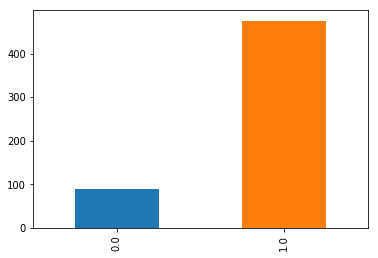

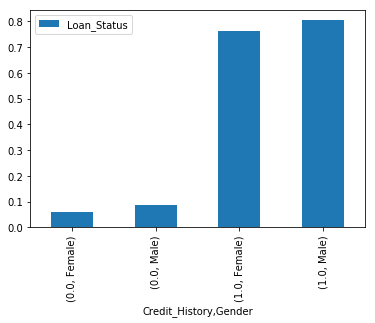

In [18]:
temp1.plot(kind="bar")

temp2.plot(kind='bar')

In [19]:
temp3=pd.crosstab(index=[df['Credit_History'],df['Gender']],columns=df['Loan_Status'])

In [20]:
temp3

Loan_Status             N    Y
Credit_History Gender         
0.0            Female  16    1
               Male    63    6
1.0            Female  20   64
               Male    75  307

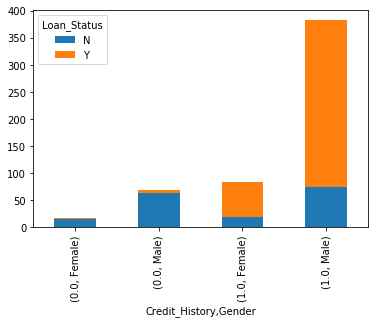

In [21]:
temp3.plot(kind='bar', stacked=True)

In [22]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [23]:
df['Married'].value_counts(ascending=True)

No     213
Yes    398
Name: Married, dtype: int64

In [38]:
df.pivot_table(index='Married',values='Loan_Status',aggfunc=lambda x: x.map({"Yes":1,"No":0}).mean())

""
Married


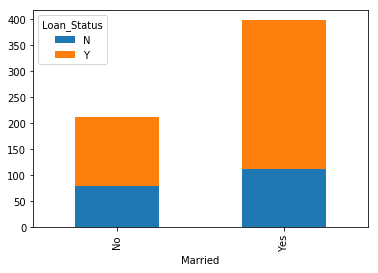

In [25]:
pd.crosstab(df['Married'],df['Loan_Status']).plot(kind='bar', stacked=True)

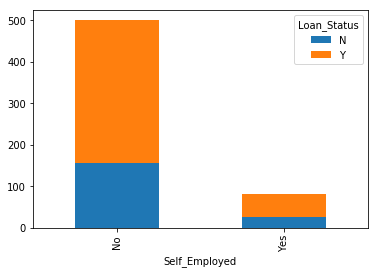

In [26]:
pd.crosstab(df['Self_Employed'],df['Loan_Status']).plot(kind='bar', stacked=True)

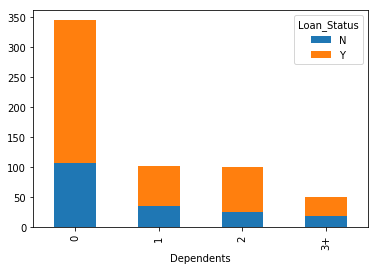

In [27]:
pd.crosstab(df['Dependents'],df['Loan_Status']).plot(kind='bar', stacked=True)

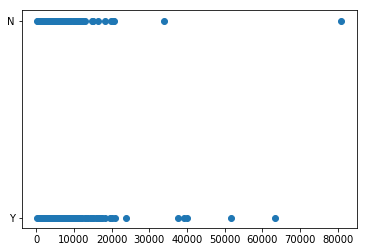

In [28]:
plt.scatter(df['ApplicantIncome'],df['Loan_Status'])

In [29]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

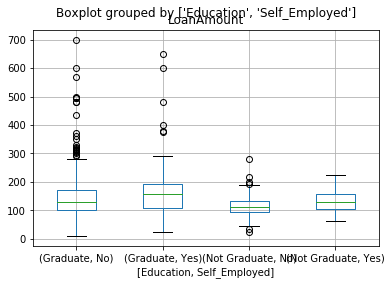

In [30]:
df.boxplot(column='LoanAmount', by=['Education','Self_Employed'])

In [31]:
df['Self_Employed'].fillna('No', inplace=True)

In [32]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [40]:
table=df.pivot_table(values='LoanAmount',index='Self_Employed',columns="Education", aggfunc=np.median)

In [41]:
table

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,113.0
Yes,157.5,130.0


In [44]:
def fage(x):
    return table.loc[x['Self_Employed'],x['Education']]

In [46]:
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

TypeError: "value" parameter must be a scalar, dict or Series, but you passed a "DataFrame"

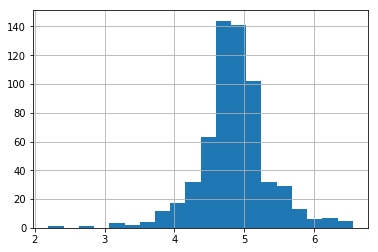

In [248]:
np.log(df['LoanAmount']).hist(bins=20)

In [250]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])

In [260]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']

In [261]:
df['TotalIncome_log'] = np.log(df['totalincome'])

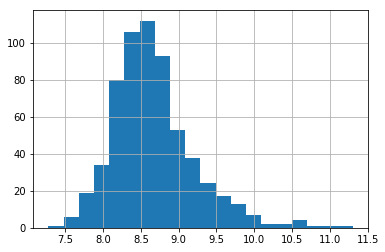

In [259]:
np.log(df['totalincome']).hist(bins=20)

In [254]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
totalincome          0
LoanAmount_log       0
totalincome_log      0
dtype: int64

In [55]:
df['Gender'].mode()[0]

'Male'

In [56]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [57]:
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

In [59]:
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

In [60]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

In [61]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [62]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
totalincome          0
dtype: int64

In [63]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,totalincome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,130.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [64]:
from sklearn.preprocessing import LabelEncoder

In [70]:
var_mod = ['Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

In [71]:
le=LabelEncoder()

In [72]:
df['Gender']=le.fit_transform(df['Gender'])

In [75]:
for i in var_mod:
    df[i]=le.fit_transform(df[i])
df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
totalincome          float64
dtype: object

In [76]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,totalincome
0,LP001002,1,0,0,0,0,5849,0.0,130.0,360.0,1.0,2,1,5849.0
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0


In [78]:
df.drop('Loan_ID', axis=1,inplace=True)

In [79]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,totalincome
0,1,0,0,0,0,5849,0.0,130.0,360.0,1.0,2,1,5849.0
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [81]:
#logistic regression

In [92]:

model=LogisticRegression()

In [93]:
x_train=df[['Credit_History','Education','Married','Self_Employed','Property_Area']]
y_train=df['Loan_Status']

In [94]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [95]:
predictions=model.predict(x_train)

In [96]:
accuracy=metrics.accuracy_score(predictions,y_train)

In [104]:
accuracy

0.8094462540716613

In [106]:
print(metrics.classification_report(predictions,y_train))

             precision    recall  f1-score   support

          0       0.43      0.92      0.58        89
          1       0.98      0.79      0.88       525

avg / total       0.90      0.81      0.83       614



In [255]:
#random forest

In [262]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,totalincome,LoanAmount_log,totalincome_log,TotalIncome,TotalIncome_log
0,1,0,0,0,0,5849,0.0,130.0,360.0,1.0,2,1,5849.0,4.867534,8.674026,5849.0,8.674026
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0,4.852030,8.714568,6091.0,8.714568
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0,4.189655,8.006368,3000.0,8.006368
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0,4.787492,8.505323,4941.0,8.505323
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0,4.948760,8.699515,6000.0,8.699515


In [284]:
df.drop(['totalincome_log','totalincome'], axis=1, inplace=True)

KeyError: "['totalincome_log' 'totalincome'] not found in axis"

In [266]:
model_r=RandomForestClassifier(n_estimators=100)

In [297]:
x_train_r=df[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area','LoanAmount_log','TotalIncome_log']]

In [298]:
y_train_r=df['Loan_Status']

In [299]:
model_r.fit(x_train_r,y_train_r)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [300]:
predictions_r=model_r.predict(x_train_r)

In [301]:
metrics.accuracy_score(predictions_r,y_train_r)

1.0

In [302]:
model_r.feature_importances_

array([0.02158209, 0.02575148, 0.04867375, 0.02298557, 0.02117103,
       0.04287609, 0.27690284, 0.04924365, 0.2252109 , 0.26560261])

In [303]:
featimp = pd.Series(model_r.feature_importances_, index=['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area','LoanAmount_log','TotalIncome_log']).sort_values(ascending=False)
print (featimp)

Credit_History      0.276903
TotalIncome_log     0.265603
LoanAmount_log      0.225211
Property_Area       0.049244
Dependents          0.048674
Loan_Amount_Term    0.042876
Married             0.025751
Education           0.022986
Gender              0.021582
Self_Employed       0.021171
dtype: float64


In [327]:
x_train_r2=df[['Dependents', 'Credit_History', 'Property_Area','LoanAmount_log','TotalIncome_log']]

In [347]:
model_r2=RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7)

In [348]:
model_r2.fit(x_train_r2,y_train_r)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=25,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [349]:
predictions_r2=model_r2.predict(x_train_r2)

In [350]:
metrics.accuracy_score(predictions_r2,y_train_r)

0.8241042345276873

In [99]:
df.shape[0]

614

In [100]:
#cross validation

In [174]:
kf=KFold(614,n_folds=5)


In [175]:
#test

In [102]:
df1=pd.read_csv('test_Y3wMUE5_7gLdaTN.txt')

In [103]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [107]:
df1['Self_Employed'].fillna('No', inplace=True)

In [108]:
table=df1.pivot_table(values='LoanAmount',index='Self_Employed',columns="Education", aggfunc=np.median)

In [109]:
table

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,120.0
Yes,137.0,119.0


In [130]:
df1.shape

(367, 13)

In [111]:
df1.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [113]:
df1['LoanAmount'].fillna(df1['LoanAmount'].mean(), inplace=True)

In [114]:
df1.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [115]:
df1['totalincome']=df1['ApplicantIncome']+df1['CoapplicantIncome']

In [116]:
df1['Gender'].fillna(df1['Gender'].mode()[0], inplace=True)

In [117]:
df1['Dependents'].fillna(df1['Dependents'].mode()[0], inplace=True)

In [132]:
df1['Credit_History'].fillna(df1['Credit_History'].mode()[0], inplace=True)

In [134]:
df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].mode()[0], inplace=True)

In [135]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
totalincome          0
dtype: int64

In [136]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,totalincome
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,5720
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,4576
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,6800
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2,4886
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2,3276


In [137]:
var=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

In [138]:
le1=LabelEncoder()

In [309]:
for i in var:
    df1[i]=le1.fit_transform(df1[i])

In [311]:
df1['LoanAmount_log'] = np.log(df1['LoanAmount'])

In [314]:
df1['TotalIncome_log'] = np.log(df1['totalincome'])

In [315]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,totalincome,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2,5720,4.700480,8.651724,8.651724
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,4576,4.836282,8.428581,8.428581
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2,6800,5.337538,8.824678,8.824678
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2,4886,4.605170,8.494129,8.494129
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2,3276,4.356709,8.094378,8.094378


In [141]:
df1.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,totalincome
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,0.809264,0.634877,0.806540,0.228883,0.100817,4805.599455,1569.577657,136.132597,342.822888,0.839237,1.079019,6375.177112
std,0.393417,0.482122,1.065177,0.420687,0.301498,4910.685399,2334.232099,60.946040,64.658402,0.367814,0.824337,5199.423594
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,6.000000,0.000000,0.000000,1760.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2864.000000,0.000000,101.000000,360.000000,1.000000,0.000000,4156.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3786.000000,1025.000000,126.000000,360.000000,1.000000,1.000000,5205.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5060.000000,2430.500000,157.500000,360.000000,1.000000,2.000000,6980.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,72529.000000,24000.000000,550.000000,480.000000,1.000000,2.000000,72529.000000


In [142]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 13 columns):
Loan_ID              367 non-null object
Gender               367 non-null int64
Married              367 non-null int64
Dependents           367 non-null int64
Education            367 non-null int64
Self_Employed        367 non-null int64
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null float64
Property_Area        367 non-null int64
totalincome          367 non-null int64
dtypes: float64(3), int64(9), object(1)
memory usage: 37.4+ KB


In [225]:
#final

In [351]:
x_test=df1[['Dependents', 'Credit_History', 'Property_Area','LoanAmount_log','TotalIncome_log']]
predictions1=model_r2.predict(x_test)

In [352]:
predictions1

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [353]:
pre_df=pd.DataFrame({'Loan_Status':predictions1})

In [354]:
sol=pd.concat([df1['Loan_ID'],pre_df], axis=1)

In [336]:
sol

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
5,LP001054,1
6,LP001055,1
7,LP001056,0
8,LP001059,1
9,LP001067,1


In [355]:
sol['Loan_Status']=np.where(sol.Loan_Status==1,'Y','N')

In [356]:
sol.to_csv('solution.csv', index=False)